README: 
This is ipynb file. Make sure you can use Jupyter on your end. The kernel I used is Python 3.9.13. If you don't have pandas/matplotlib installed. Make sure you have installed pip3, so you can use the code below to install the required libraries. 

In [17]:
!pip3 install pandas
!pip3 install matplotlib

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 32.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 KB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 35.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.0/245.0 KB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 KB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 42.0 MB/s eta 0:00:00a 0:00:01
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Question 1.1 (20 points: 5 points for each of the 3 graphs, 5 points for discussion)

Researchers often summarize a large collection of measurement data using distribution functions. Imagine you have a list of Web pages with different sizes, in terms of number of bytes. The cumulative distribution function (CDF) of page sizes would have a y-axis of "the fraction of Web pages that are less than or equal to x bytes", and an x-axis of the number of bytes. The graph would start at y=0, since no Web pages have less than or equal to 0 bytes, and reach y=1 when x reaches the size of the largest page.

Create a CDF where the x-axis is the number of bytes in a flow, and the y-axis is the percentage of flows with that many bytes or less. Make this same plot but for flows transported by UDP and TCP. Provide two observations about trends or patterns you can determine from this graph. Make sure to use logarithmic scales for x-axis and linear scale for y-axis for figures to be clear.

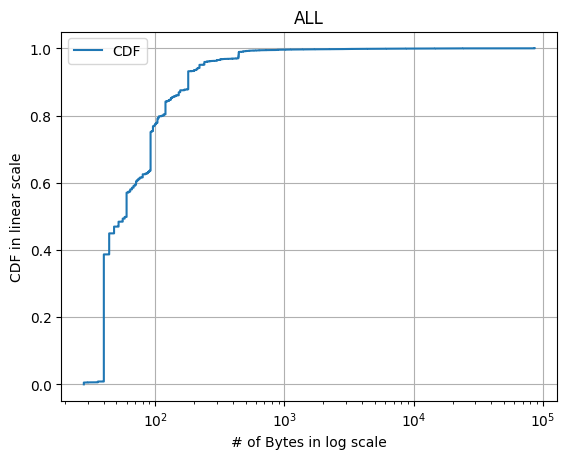

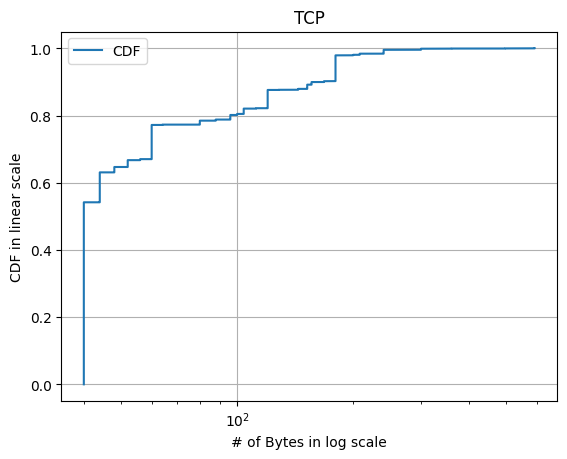

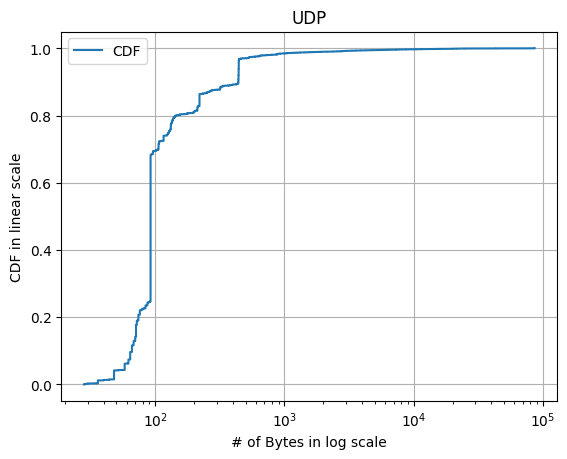

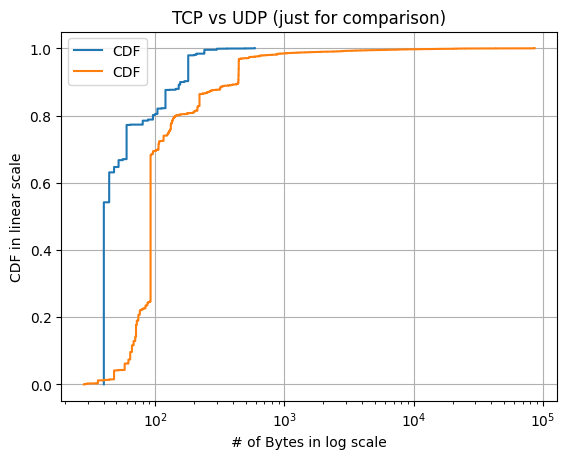

In [95]:
data_Q1 = pd.read_csv('netflow.csv')

def plot_cdf(data_Q1, protocol=None):
    if protocol:
        subset = data_Q1[data_Q1['Protocol'] == protocol]
        values = np.sort(subset['Bytes'])
    else:
        subset = data_Q1
        values = np.sort(subset['Bytes'])
    cdf = np.arange(1, len(values)+1) / len(values)
    plt.step(values, cdf, label="CDF", where='post')

plot_cdf(data_Q1)
plt.xscale('log')
plt.xlabel('# of Bytes in log scale')
plt.ylabel('CDF in linear scale')
plt.title('ALL')
plt.legend()
plt.grid(True)
plt.show()

plot_cdf(data_Q1, 'TCP')
plt.xscale('log')
plt.xlabel('# of Bytes in log scale')
plt.ylabel('CDF in linear scale')
plt.title('TCP')
plt.legend()
plt.grid(True)
plt.show()

plot_cdf(data_Q1, 'UDP')
plt.xscale('log')
plt.xlabel('# of Bytes in log scale')
plt.ylabel('CDF in linear scale')
plt.title('UDP')
plt.legend()
plt.grid(True)
plt.show()


plot_cdf(data_Q1, 'TCP')
plot_cdf(data_Q1, 'UDP')
plt.xscale('log')
plt.xlabel('# of Bytes in log scale')
plt.ylabel('CDF in linear scale')
plt.title('TCP vs UDP (just for comparison)')
plt.legend()
plt.grid(True)
plt.show()



TCP traffic is used more, which is in line with TCP's characteristics. The distribution of TCP is more average, indicating a broader range of usage.
UDP is rising rapidly at around 10^2, indicating more usage of small traffic.
The size of both TCP and UDP packets is less than 10^4 bytes. Showing the byte limit of TCP and UDP.

### Question 1.2 (10 points: 2.5 points for each top ten list, 2.5 points for the percentages)

Get the number of flows for each source IP address, only considering its 16-bit prefix (for example: the IP addresses 255.255.0.1 and 255.255.0.2 are counted as there being two 255.255 addresses). What are the top ten IP address prefixes, and what percentage of all the flows recorded are they involved in? (No need to report the percentage per source IP address, just report the aggreagate percentage for top ten source IP addresses.)

Now, aggregate the number of bytes by source IP addresses the same way. What are the top ten IP address prefixes in this case, and what percentage of bytes sent across all flows are they responsible for (no need to report the percentage per source IP address, just report the aggreagate percentage for top ten source IP addresses)?

In the first part you find to IP addresses based on flow count.
In the second part you find the top IP addresses based on number of bytes they have sent.

In [113]:
data_Q2 = pd.read_csv('netflow.csv')
data_Q2['Src IP Prefix'] = data_Q2['Src IP addr'].apply(lambda x: '.'.join(x.split('.')[:2]))
flow_counts = data_Q2['Src IP Prefix'].value_counts()

top_ten_flows = flow_counts.head(10)
top_ten_flows_percentage = (top_ten_flows / flow_counts.sum()) * 100
top_ten_flows_aggregate_percentage = top_ten_flows_percentage.cumsum()

print(top_ten_flows)
print('')
print(top_ten_flows_percentage)
print('')
print("aggregated percentage: ", round(top_ten_flows_aggregate_percentage.iloc[-1], 2), "%")
print('')
print('')
print('')

byte_counts = data_Q2.groupby('Src IP Prefix')['Bytes'].sum()
top_ten_bytes = byte_counts.nlargest(10)
top_ten_bytes_percentage = (top_ten_bytes / byte_counts.sum()) * 100
top_ten_bytes_aggregate_percentage = top_ten_bytes_percentage.cumsum()


print(top_ten_bytes)
print('')
print(top_ten_bytes_percentage)
print('')
print("aggregated percentage: ", round(top_ten_bytes_aggregate_percentage.iloc[-1], 2), "%")

Src IP Prefix
116.211    17019
169.54      9424
222.186     5269
163.53      2981
169.45      2494
94.23       2205
141.212     2143
212.83      2042
64.125      1852
184.105     1775
Name: count, dtype: int64

Src IP Prefix
116.211    16.153189
169.54      8.944571
222.186     5.000949
163.53      2.829347
169.45      2.367122
94.23       2.092825
141.212     2.033979
212.83      1.938117
64.125      1.757783
184.105     1.684700
Name: count, dtype: float64

aggregated percentage:  44.8 %



Src IP Prefix
212.83     928311
169.54     867928
116.211    680922
140.205    510833
128.112    506604
42.120     326122
169.45     229448
222.186    211068
5.8        126940
163.53     120920
Name: Bytes, dtype: int64

Src IP Prefix
212.83     7.702662
169.54     7.201634
116.211    5.649952
140.205    4.238638
128.112    4.203548
42.120     2.705998
169.45     1.903845
222.186    1.751337
5.8        1.053285
163.53     1.003334
Name: Bytes, dtype: float64

aggregated percentage:  37.41 %


### Question 1.3 (5 points: 2 points for describing port number correctly, 3 points for correct percentage)

The src/dst port number of a connection corresponds to the src/dst port number for a UDP/TCP packet. This number represents the application protocol that the packet either came from or is sent to. See [this wikipedia page](https://en.wikipedia.org/wiki/List_of_TCP_and_UDP_port_numbers) for more information on what these port numbers mean.

Pick a port number less than 1024, provide the type of service it's associated with, and report the percentage of flows it appears in as the src port and the percentage of flows it appears in as the dst port.

//https://en.wikipedia.org/wiki/List_of_TCP_and_UDP_port_numbers

In [118]:
data_Q3 = pd.read_csv('netflow.csv')

# 53    TCP,UDP     Description:DNS 
pport = 53
nname = "DNS"

src_p = (data_Q3['Src port'] == pport).mean() 
dst_p = (data_Q3['Dst port'] == pport).mean()
print(f"Port: {pport} ({nname})")
print(f"Port {pport} as src port: {src_p * 100:.2f}%")
print(f"Port {pport} as dst port: {dst_p * 100:.2f}%")


Port: 53 (DNS)
Port 53 as src port: 2.89%
Port 53 as dst port: 3.26%


### Question 1.4 (10 points: 2 points for each of the 3 percentages, 4 points for discussion)

Observe that this router is responsible for the address block 128.112.0.0/16. What percentage of bytes is sent from this router, and what percentage is sent to this router? What percentage of bytes have a destination and source IP address that are both in this address block? What do these metrics tell you about traffic happening with this router?

In [125]:
data_Q4 = pd.read_csv('netflow.csv')

is_from_subnet = data_Q4['Src IP addr'].str.startswith('128.112.')
is_to_subnet = data_Q4['Dst IP addr'].str.startswith('128.112.')

total_bytes = data_Q4['Bytes'].sum()
from_bytes = data_Q4.loc[is_from_subnet, 'Bytes'].sum()
to_bytes = data_Q4.loc[is_to_subnet, 'Bytes'].sum()
within_bytes = data_Q4.loc[is_from_subnet & is_to_subnet, 'Bytes'].sum()

print(f"From subnet: {from_bytes / total_bytes * 100:.2f}%")
print(f"To subnet: {to_bytes / total_bytes * 100:.2f}%")
print(f"Within subnet: {within_bytes / total_bytes * 100:.2f}%")



From subnet: 4.20%
To subnet: 95.95%
Within subnet: 0.84%


From the subnet (4.20%): The router sends much less data than it receives, indicating users are likely consuming rather than providing content.
To the subnet (95.95%): A high volume of data is received, pointing to heavy consumption of external resources by users.
Within the subnet (0.84%): Minimal internal traffic suggests the subnet isn't heavily used for internal communications.
In summary, the router mainly delivers external content to its users.

### Question 1.5 (10 points)

The data you worked with comes from a university's campus, from 6:05 AM to 6:10 AM. What changes would expect in your answers for the previous questions if this data was collected from a router that was serving devices at a busy public cafe during the afternoon? Provide reasons as to why.

The data sourced from a university campus at 6 AM likely reflects a student body that's just starting their day, primarily engaged in light activities such as checking emails, streaming music, and gearing up for a structured day ahead. The early hour suggests a disciplined crowd with planned routines and tasks that are not too demanding.

Conversely, data from a router in a bustling public café during the afternoon would differ greatly. The demographic here extends beyond students to include various professionals and the general public in a densely populated setting. Many visitors might be there to combat post-lunch drowsiness, engaging in passive activities like reading or watching videos while sipping coffee. The afternoon atmosphere leans towards relaxation, indicating a diverse array of online activities. Overall, the volume of traffic is expected to rise. The AS paths are likely different; campus routers may access more academic sites and scholarly materials, while café connectivity might see a higher usage of social media and streaming services, leading to a broader range of accessed content and services.

Q1.1: The distribution of TCP versus UDP traffic should remain consistent because these protocols have inherent characteristics that don't change based on user behavior.
Q1.2: The increased density of individuals in a café, typically engaging in lighter activities, may lead to a decrease in the aggregated percentage for individual IP prefixes due to a higher number of users. Similarly, the total bytes transmitted might also drop if the café patrons are not involved in data-intensive tasks.
Q1.3: The usage shift from academic resources to more leisurely activities like social media at the café may result in different ports becoming more prevalent in the traffic data.
Q1.4: With more patrons likely to be engaged in communication through video or phone calls, there might be an increase in "from subnet", a slight reduction in "to subnet", while internal network communication ("within subnet") could stay relatively unchanged.


### Question 2.1 (15 points: 5 points for top ten list, 5 points for percentage, 5 for points for discussion)
From the bgp_route.csv, what are the 10 most frequent ASes in all the BGP paths? What percentage of paths are they found in? Using your favorite browser and search engine, give the name of the AS and the country they belong to (Hint: search for "AS number lookup", give the country's full name). Why might it be problematic for an AS to be commonly found in these routes?

In [130]:
data_21 = pd.read_csv('bgp_route.csv')

as_paths = data_21['ASPATH'].str.split().explode()
top_ten = as_paths.value_counts().head(10)
top_ten_percentages = (top_ten / len(data_21)) * 100

print("10 most frequent ASes in all the BGP paths")
print(top_ten)
print('')
print('')
print('')
print("Percentage of each AS in all the BGP paths")
print(top_ten_percentages)


10 most frequent ASes in all the BGP paths
ASPATH
3356     96296
3257     75208
1299     64901
6939     56839
2914     54805
174      45422
37100    45400
49788    41468
3130     38180
3303     36486
Name: count, dtype: int64



Percentage of each AS in all the BGP paths
ASPATH
3356     19.797209
3257     15.461790
1299     13.342804
6939     11.685361
2914     11.267197
174       9.338174
37100     9.333651
49788     8.525283
3130      7.849313
3303      7.501048
Name: count, dtype: float64


I used two website for this section: 
https://dnschecker.org/asn-whois-lookup.php 
https://hackertarget.com/as-ip-lookup/

3356        LEVEL3, United State
3257        GTT-BACKBONE GTT, United State
1299        TWELVE99 Arelion, fka Telia Carrier, Sweden
6939        HURRICANE, United State
2914        NTT-LTD-2914, United State
174         COGENT-174, United State
37100       SEACOM-AS, Mauritius
49788       NEXTHOP, Norway
3130        RGNET-SEA RGnet Seattle Westin, Estonia
3303     	SWISSCOM Swisscom Switzerland Ltd, Switzerland

Why might it be problematic for an AS to be commonly found in these routes?
If an AS is too common to be found, once the AS is done for some reason, the network will be influenced heavily. There is also a regulatory risk if the AS is not from your country. A traffic bottleneck is likly to established if one AS is so commonly used. 

### Question 2.2 (10 points: 5 points for graph, 5 points for discussion)
Plot a cumulative distribution function (CDF) where the x-axis is the length of a BGP path and y-axis is the proportion of the paths with that length or less. The length is the number of unique ASes in an entry's ASPATH. What does this graph tell you about BGP route lengths? What does this graph tell you about a packet’s travel across the internet?

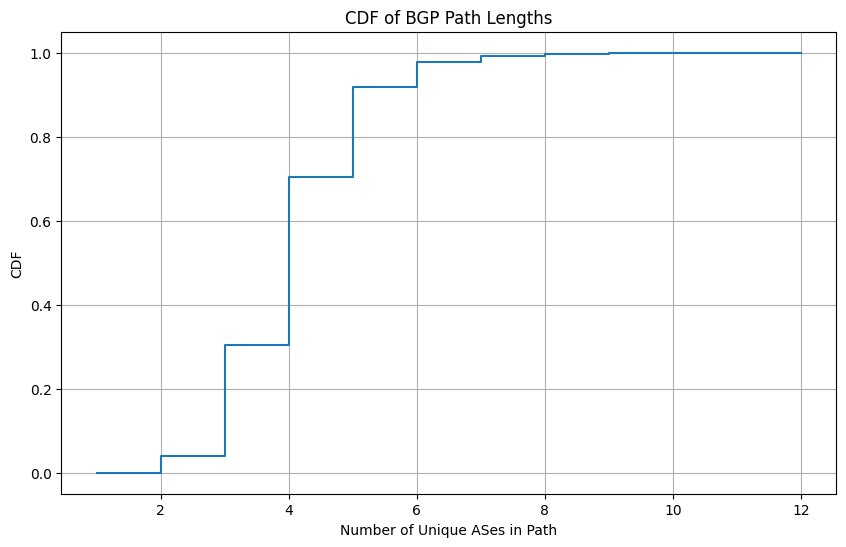

In [43]:
data_22 = pd.read_csv('bgp_route.csv')

data_22['Unique AS Count'] = data_22['ASPATH'].apply(lambda x: len(set(x.split())))

cdf_data = data_22['Unique AS Count'].value_counts().sort_index().cumsum()
cdf_data /= cdf_data.iloc[-1]


plt.figure(figsize=(10, 6))
plt.plot(cdf_data.index, cdf_data, drawstyle='steps-post')
plt.xlabel('Number of Unique ASes in Path')
plt.ylabel('CDF')
plt.title('CDF of BGP Path Lengths')
plt.grid(True)
plt.show()


What does this graph tell you about BGP route lengths? What does this graph tell you about a packet’s travel across the internet?
More than half of routes have a length of 3-6, most of the BGP updates are relatively short. It berely goes above 6 means packet's usually found it's dest in vely few travels.  
Also something you see a packet travels more than 10 times, which shows the typification of internet.

### Question 2.3 (10 points: 5 points for graph, 5 points for average)
Using bgp_updates.csv, how many BGP updates are done per minute, on average? Make a graph where the x-axis is time and the y-axis is the number of updates at that second.

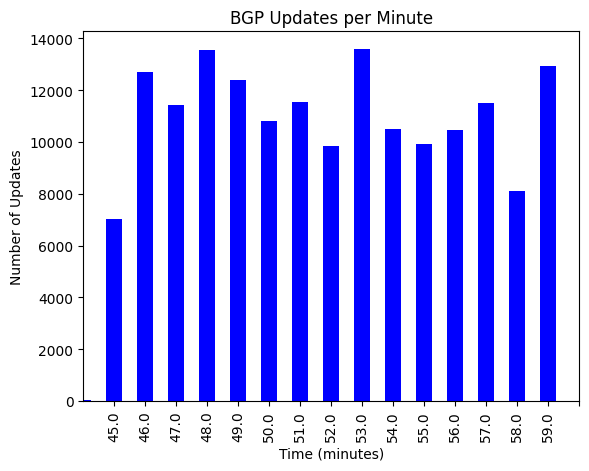

Average number of BGP updates per minute: 10391.19


In [49]:
df = pd.read_csv('bgp_update.csv')

def convert_to_seconds(time_str):
    minutes, seconds = time_str.split(':')
    minutes = int(minutes)
    seconds = float(seconds)
    return minutes * 60 + seconds

df['Seconds'] = df['TIME'].apply(convert_to_seconds)
df['Minute'] = df['Seconds'] // 60
updates_per_minute = df.groupby('Minute').size()
average_updates = updates_per_minute.mean()

updates_per_minute.plot(kind='bar', color='blue')

# remove 0.0 column from TIME
plt.xticks(ticks=range(1, len(updates_per_minute) + 1))
plt.xlim(0, len(updates_per_minute))

plt.title('BGP Updates per Minute')
plt.xlabel('Time (minutes)')
plt.ylabel('Number of Updates')
plt.show()

print(f"Average number of BGP updates per minute: {average_updates:.2f}")


### Question 2.4 (10 points: 5 points for graph, 5 points for discussion)
Plot a CDF where the x-axis is the top percentage of ASes by the number of updates and the y-axis is the percentage of updates messages that are from that top percentage. 

Include all ASes from bgp_route.csv, not just the bgp_update.csv. Make sure to use logarithmic scales for graph axes if the distribution is not clear. What can you infer about the ASes tracked here, specifically about their stability?

The x-axis will be the percentage of ASs. The purpose of this question is to investigate what is the ratio of ASs that send updates. Therefore, you need to pre-process the update data from all known ASs and then normalize their count to a percentage before plotting.

2 files together.
X: top percentage of ASes by  number of update. For example, if there are a total of 1000 updates, and AS#9 has sent 10 updates, the percentage would be 1%. Calculate this for all the ASs and then plot the CDF.
Y: the percentage of updates messages that are from that top percentage

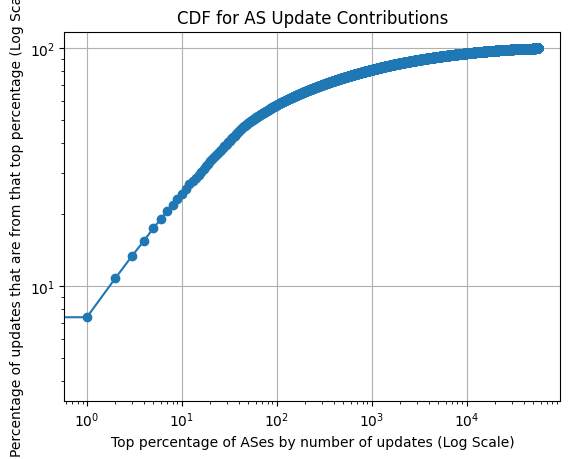

In [10]:
df_route = pd.read_csv('bgp_route.csv')
df_update = pd.read_csv('bgp_update.csv')

all_ases = pd.concat([df_route['ASPATH'].str.split().explode(), df_update['ASPATH'].str.split().explode()])
as_percentage = (all_ases.value_counts() /  all_ases.value_counts().sum()) * 100
cdf_data = as_percentage.cumsum()


plt.plot(cdf_data.index, cdf_data, marker='o', linestyle='-')
plt.xscale('log')
plt.yscale('log')
plt.title('CDF for AS Update Contributions')
plt.xlabel('Top percentage of ASes by number of updates (Log Scale)')
plt.ylabel('Percentage of updates that are from that top percentage (Log Scale)')
plt.grid(True)
plt.show()



What can you infer about the ASes tracked here, specifically about their stability?

The CDF starts with a steep curve at the beginning. It shows a a few ASes are actually responsible for a large number of BGP updates. This is not a good sign usually. On the right side of CDF, we see the long flat tail. It show the BGP is supporting a lot of paths. THis is good by showing its diversity. 
